In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive/Term_Project_Unsupervised_Learners/data/"
path = "/content/drive/My Drive/Term_Project_Unsupervised_Learners/data/" 

aggregated_all_useful_columns_for_feature_engineering.csv
aggregated_final_clean_actor_director_istopk_logrev.csv
aggregated_final_clean_actor_director_istopk_logrev.gsheet
aggregated_final_clean_actor_istopk_logrev.csv
aggregated_selected_columns.csv
aggregated_selected_columns_full_revenue.csv
aggregated_selected_columns_with_actor_director_istopk_logrev.csv
aggregated_seriously_no_missing.csv
correlation_matrix1.csv
correlation_matrix.csv
original_data
preprocessing
test_2015_2017.csv
test_2015_2017_final.csv
test_2015_2017_prod_comp_class_actor_director_istopk_logrev.csv
test_2015_2017_prod_comp_class_actor_director_istopk_logrev_cubic_extrapolation.csv
test_2015_2017_prod_comp_class_actor_director_istopk_logrev_genres.csv
test_2015_2017_prod_comp_class_actor_director_istopk_logrev_linear_extrapolation.csv
test_2015_2017_prod_comp_class_actor_director_istopk_logrev_logpop.csv
test_2015_2017_prod_comp_class_actor_director_istopk_logrev_median.csv
test_2015_2017_prod_comp_class.csv
t

In [ ]:
data = pd.read_csv(path+"aggregated.csv")

## Get top 5 actors for each movie

In [ ]:
#convert cast to list
import ast 
for i in range(data.shape[0]):
    data['cast'][i] = ast.literal_eval(data['cast'][i]) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#keep only the first five actors
for i in range(data.shape[0]):
    if len(data['cast'][i]) > 5:
        data['cast'][i] = data['cast'][i][:5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#create a new variable to only store the name of the actors
data['top5_actors'] = [[] for _ in range(len(data))]
for i in range(data.shape[0]):
    for j in range(len(data['cast'][i])):
        data['top5_actors'][i].append(data['cast'][i][j]['name'])

##Calculate log revenue

In [ ]:
#log revenues
#convert zero to NA
data[data['revenue']==0.0] = np.nan

In [ ]:
#convert revenues to log revenuew
data['revenue'] = np.log(data['revenue'])

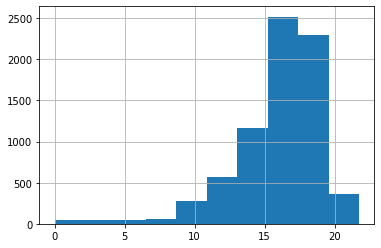

In [ ]:
#check distribution
data['revenue'].hist()

##Create an ordinal variable for log revenue
Originally we wanted to do classification of log revenue

In [ ]:
#make a categorical variable for log revenues based on quantile
data['log_revenue'] = [np.nan for _ in range(len(data))]
for i in data[data['revenue'].notnull()].index:
    if data['revenue'][i] < data.revenue.quantile(0.333):
        data['log_revenue'][i] = 'L'
    elif data['revenue'][i] < data.revenue.quantile(0.666):
        data['log_revenue'][i] = 'M'
    else:
        data['log_revenue'][i] = 'H'


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6

In [ ]:
#save data 
data.to_csv(path+'aggregated_new.csv',index_label = 'id')

In [ ]:
#load data
movie = pd.read_csv(path+"aggregated_new.csv")

## Production company

In [ ]:
#load data
train_sub = pd.read_csv(path+"train_sub_1980_2012.csv")
val = pd.read_csv(path+'val_2013_2014.csv')
train = pd.read_csv(path+'train_1980_2014.csv')
test = pd.read_csv(path+'test_2015_2017.csv')

In [ ]:
#delete production company column
del train_sub['production_company_class']
del val['production_company_class']
del train['production_company_class']
del test['production_company_class']

In [ ]:
#convert production companies to list
import ast 
def comp_to_list(data):
    for i in data[data['production_companies'].isnull()].index:
        data['production_companies'][i] = np.nan
    for i in data[data['production_companies'].notnull()].index:
        if type(data['production_companies'][i]) is not list:
            data['production_companies'][i] = ast.literal_eval(data['production_companies'][i])
    return None

In [ ]:
comp_to_list(train_sub)
comp_to_list(val)
comp_to_list(train)
comp_to_list(test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#extract first production company
def first_comp(data):
    data['first_company'] = [np.nan for _ in range(len(movie_new))]
    for i in data.index:
        if len(data['production_companies'][i]) > 0:
            data['first_company'][i] = data['production_companies'][i][0]['name']

In [ ]:
#count number of movies each company produced
def comp_num_dict(data):
    prod_comp = {}
    for i in data[data['first_company'].notnull()].index:
        if data['first_company'][i] not in prod_comp:
            prod_comp[data['first_company'][i]] = 1
        else:
            prod_comp[data['first_company'][i]] += 1
    return prod_comp

In [ ]:
train_sub_prod_comp = comp_num_dict(train_sub)
train_prod_comp = comp_num_dict(train)

In [ ]:
#create a new column for production company class and also return a dict to map the company with the class
def company_class_col(data, comp_num):
    data['production_company_class'] = ['other' for _ in range(len(data))]
    for i in data[data['first_company'].notnull()].index:
        if comp_num[data['first_company'][i]] > 100:
            data['production_company_class'][i] = 'major'
        elif comp_num[data['first_company'][i]] <= 100 and comp_num[data['first_company'][i]] >= 10:
            data['production_company_class'][i] = 'medium'
        else:
            data['production_company_class'][i] = 'minor'
    comp_dict = {}
    for i in range(len(data)):
        if data['first_company'][i] not in comp_dict:
            comp_dict[data['first_company'][i]] = data['production_company_class'][i]
        else:
            continue
    return comp_dict

In [ ]:
train_sub_comp_dict = company_class_col(train_sub, train_sub_prod_comp)
train_comp_dict = company_class_col(train, train_prod_comp)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#estimate production company class on validation and test set
def estimate_comp_class(data, comp_dict):
    data['production_company_class'] = ['other' for _ in range(len(data))]
    for i in range(len(data)):
        if data['first_company'][i] in comp_dict:
            data['production_company_class'][i] = comp_dict[data['first_company'][i]]
        else:
            continue
    return None

In [ ]:
estimate_comp_class(val, train_sub_comp_dict)
estimate_comp_class(test, train_comp_dict)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#save data
train_sub.to_csv(path+'train_sub_1980_2012_prod_comp_class.csv')
val.to_csv(path+'val_2013_2014_prod_comp_class.csv')
train.to_csv(path+'train_1980_2014_prod_comp_class.csv')
test.to_csv(path+'test_2015_2017_prod_comp_class.csv')
#######END#########

In [ ]:
#save data 
movie_new.to_csv(path+'aggregated_pd_companies.csv',index_label = 'id')

##Budget

In [ ]:
#11.21
#fill in missing values in budget
data = pd.read_csv(path+"aggregated_aggregated.csv")

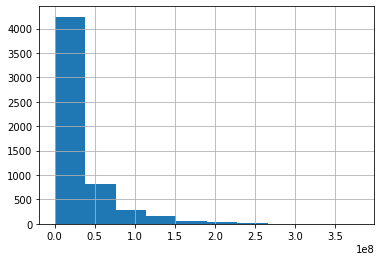

In [ ]:
data['budget'].hist()

In [ ]:
#how many missing values
sum(data['budget'] == 0.0)

1237

In [ ]:
#change 0.0 values to na
data['budget'][data['budget'] == 0.0] = np.nan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#statistics on budget
data['budget'].describe()

count    4.382000e+03
mean     3.559432e+07
std      4.255135e+07
min      1.000000e+00
25%      7.500000e+06
50%      2.000000e+07
75%      4.700000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [ ]:
#since the data is skewed to the right, change na to median
median_budget = data['budget'].median()
data['budget'][data['budget'].isnull()] = median_budget

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#save data
data.to_csv(path+'aggregated_aggregated.csv',index_label = 'id')

In [ ]:
#11.22 
#change budget to log budget
data = pd.read_csv(path+"final_aggregate.csv")

In [ ]:
data['log_budget'] = np.log(data['budget'])

In [51]:
data = pd.read_csv(path + 'aggregated_seriously_no_missing.csv')

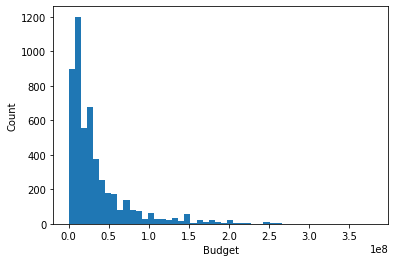

In [63]:
plt.hist(x = data['budget_final'],bins=50)
plt.xlabel('Budget')
plt.ylabel('Count')
plt.savefig(g_path + 'budget.png')

##Title Length

In [ ]:
#get length of title
#remove stopwords
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
{'her', 'any', 'some', 'am', 'more', 'to', 'there', 'how', 'no', 'have', 'because', 'too', "shouldn't", 'when', 'its', 'can', 'hasn', 'doesn', 'all', "she's", 'couldn', 'what', 'it', 'at', 'why', 'their', 'so', 're', "needn't", 'nor', 'didn', 'ain', 'here', 'that', "shan't", 'himself', "haven't", 'below', 'shan', 'they', "won't", 'other', 'aren', 'off', 'those', 'both', 'few', 'and', 'from', 'through', 'between', 'isn', 'themselves', 'theirs', 'should', 't', 'mightn', 'further', 'than', 'being', 'we', 's', 'won', 'his', 'for', 'o', 'm', 'doing', 'yourselves', 'then', 'herself', 'same', 'up', 'is', 'been', "didn't", 'with', "that'll", "you've", "couldn't", 'out', 'about', 'now', 'over', "isn't", 'once', 'my', 'were', 'had', 'in', 'where', "hasn't", 'does', 'hadn', "

In [ ]:
data['title_length'] = [0 for _ in range(len(data))]
for i in range(len(data)):
    word_tokens = word_tokenize(data['title'][i].lower())
    filtered_title = [w for w in word_tokens if not w in stop_words] 
    data['title_length'][i] = len(filtered_title)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
data['title_length'].describe()

count    5619.000000
mean        2.168713
std         1.267670
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        11.000000
Name: title_length, dtype: float64

In [ ]:
data.to_csv(path+'aggregated_logbudget_titlelength.csv',index_label = 'id')

##Check on release year

In [ ]:
data = pd.read_csv(path+'aggregated_genre_collection_actor_istopk_logrev.csv')

In [ ]:
for i in range(len(data)):
    data['release_date'][i] = str(data['release_date'][i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data['release_year'] = ['' for _ in range(len(data))]
for i in range(len(data)):
    data['release_year'][i] = data['release_date'][i].split('-')[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
for i in range(len(data)):
    data['release_year'][i] = int(data['release_year'][i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
sum(data['release_year'] < 1980)

545

## Baseline model

In [4]:
#load data
train_sub = pd.read_csv(path + 'train_sub_1990_2012_final.csv')
val = pd.read_csv(path + 'val_2013_2014_final.csv')
train = pd.read_csv(path + 'train_1990_2014_final.csv')
test = pd.read_csv(path + 'test_2015_2017_final.csv')

In [ ]:
print(len(train_sub))
print(len(train))

3403
3832


In [45]:
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#First baseline: use budget and production company

In [ ]:
####train sub to validation
train_sub_X_1 = train_sub[['log_budget_final','major','medium','minor']]
train_sub_Y_1 = train_sub['log_revenue_final']
val_X_1 = val[['log_budget_final','major','medium','minor']]
val_Y_1 = val['log_revenue_final']

In [ ]:
#build model
regr_1 = linear_model.LinearRegression()
# Train the model using the train sub set
regr_1.fit(train_sub_X_1, train_sub_Y_1)
# Make predictions using the validtaion set
log_revenue_pred = regr_1.predict(val_X_1)

In [ ]:
# The coefficients
print('Coefficients: \n', regr_1.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(val_Y_1, log_revenue_pred))

Coefficients: 
 [0.91528504 2.51116139 2.20996147 1.16220997]
Mean squared error: 5.31


In [ ]:
####train to test
train_X_1 = train[['log_budget_final','major','medium','minor']]
train_Y_1 = train['log_revenue_final']
test_X_1 = test[['log_budget_final','major','medium','minor']]
test_Y_1 = test['log_revenue_final']

In [ ]:
#build model
regr_1 = linear_model.LinearRegression()
# Train the model using the train sub set
regr_1.fit(train_X_1, train_Y_1)
# Make predictions using the validtaion set
log_revenue_pred = regr_1.predict(test_X_1)

In [ ]:
# The coefficients
print('Coefficients: \n', regr_1.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(test_Y_1, log_revenue_pred))

Coefficients: 
 [0.91639666 2.55578963 2.20652458 0.99848731]
Mean squared error: 4.67


##Second baseline: use gender score and star power

In [ ]:
#use gender score, actor is top 100 in the past 2,5,10 years and top 5 actors average revenue in the past 2,5,10 years to predict log revenue
#train sub to validation
#train sub set
train_sub_X = train_sub[['gender_score','actor_is_top_100_of_past_10_years_0','actor_is_top_100_of_past_10_years_1','actor_is_top_100_of_past_10_years_2',
                              'actor_is_top_100_of_past_10_years_3','actor_is_top_100_of_past_10_years_4','actor_is_top_100_of_past_5_years_0','actor_is_top_100_of_past_5_years_1',
                              'actor_is_top_100_of_past_5_years_2','actor_is_top_100_of_past_5_years_3','actor_is_top_100_of_past_5_years_4','actor_is_top_100_of_past_2_years_0',
                              'actor_is_top_100_of_past_2_years_1','actor_is_top_100_of_past_2_years_2','actor_is_top_100_of_past_2_years_3','actor_is_top_100_of_past_2_years_4',
                              'actor_logrev_of_past_10_years_0','actor_logrev_of_past_10_years_1','actor_logrev_of_past_10_years_2','actor_logrev_of_past_10_years_3',
                              'actor_logrev_of_past_10_years_4','actor_logrev_of_past_5_years_0','actor_logrev_of_past_5_years_1','actor_logrev_of_past_5_years_2',
                              'actor_logrev_of_past_5_years_3','actor_logrev_of_past_5_years_4','actor_logrev_of_past_2_years_0','actor_logrev_of_past_2_years_1',
                              'actor_logrev_of_past_2_years_2','actor_logrev_of_past_2_years_3','actor_logrev_of_past_2_years_4']]
train_sub_Y = train_sub['log_revenue_final']
#validation set
val_X = val[['gender_score','actor_is_top_100_of_past_10_years_0','actor_is_top_100_of_past_10_years_1','actor_is_top_100_of_past_10_years_2',
                              'actor_is_top_100_of_past_10_years_3','actor_is_top_100_of_past_10_years_4','actor_is_top_100_of_past_5_years_0','actor_is_top_100_of_past_5_years_1',
                              'actor_is_top_100_of_past_5_years_2','actor_is_top_100_of_past_5_years_3','actor_is_top_100_of_past_5_years_4','actor_is_top_100_of_past_2_years_0',
                              'actor_is_top_100_of_past_2_years_1','actor_is_top_100_of_past_2_years_2','actor_is_top_100_of_past_2_years_3','actor_is_top_100_of_past_2_years_4',
                              'actor_logrev_of_past_10_years_0','actor_logrev_of_past_10_years_1','actor_logrev_of_past_10_years_2','actor_logrev_of_past_10_years_3',
                              'actor_logrev_of_past_10_years_4','actor_logrev_of_past_5_years_0','actor_logrev_of_past_5_years_1','actor_logrev_of_past_5_years_2',
                              'actor_logrev_of_past_5_years_3','actor_logrev_of_past_5_years_4','actor_logrev_of_past_2_years_0','actor_logrev_of_past_2_years_1',
                              'actor_logrev_of_past_2_years_2','actor_logrev_of_past_2_years_3','actor_logrev_of_past_2_years_4']]
val_Y = val['log_revenue_final']

In [ ]:
#build model
regr = linear_model.LinearRegression()
# Train the model using the train sub set
regr.fit(train_sub_X, train_sub_Y)
# Make predictions using the validtaion set
log_revenue_pred = regr.predict(val_X)

In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(val_Y, log_revenue_pred))

Coefficients: 
 [ 0.0601897   0.34792168  0.19386165 -0.11720304 -0.1466799   0.13131415
  0.22538766 -0.10994471  0.03123113  0.17028775  0.01219154  0.20301739
  0.12913776  0.41743323 -0.01825561  0.19288811  0.05302541  0.00460282
 -0.02474838  0.01240789  0.10842251  0.1203813   0.12860157  0.05781278
  0.10578113  0.05585076  0.04417214  0.02171786  0.03414483  0.00777594
 -0.01129192]
Mean squared error: 8.57


## Standardize numeric feature to see changes in MSE (just for exploration)

In [ ]:
mean_gender = np.mean(train_sub_X['gender_score'])
std_gender = np.std(train_sub_X['gender_score'])

means = [np.mean(train_sub_X['actor_logrev_of_past_10_years_0']), np.mean(train_sub_X['actor_logrev_of_past_10_years_1']), 
         np.mean(train_sub_X['actor_logrev_of_past_10_years_2']), np.mean(train_sub_X['actor_logrev_of_past_10_years_3']),
         np.mean(train_sub_X['actor_logrev_of_past_10_years_4']), np.mean(train_sub_X['actor_logrev_of_past_5_years_0']), 
         np.mean(train_sub_X['actor_logrev_of_past_5_years_1']), np.mean(train_sub_X['actor_logrev_of_past_5_years_2']), 
         np.mean(train_sub_X['actor_logrev_of_past_5_years_3']), np.mean(train_sub_X['actor_logrev_of_past_5_years_4']),
         np.mean(train_sub_X['actor_logrev_of_past_2_years_0']), np.mean(train_sub_X['actor_logrev_of_past_2_years_1']), 
         np.mean(train_sub_X['actor_logrev_of_past_2_years_2']), np.mean(train_sub_X['actor_logrev_of_past_2_years_3']), 
         np.mean(train_sub_X['actor_logrev_of_past_2_years_4'])]
stds = [np.std(train_sub_X['actor_logrev_of_past_10_years_0']), np.std(train_sub_X['actor_logrev_of_past_10_years_1']), 
         np.std(train_sub_X['actor_logrev_of_past_10_years_2']), np.std(train_sub_X['actor_logrev_of_past_10_years_3']),
         np.std(train_sub_X['actor_logrev_of_past_10_years_4']), np.std(train_sub_X['actor_logrev_of_past_5_years_0']), 
         np.std(train_sub_X['actor_logrev_of_past_5_years_1']), np.std(train_sub_X['actor_logrev_of_past_5_years_2']), 
         np.std(train_sub_X['actor_logrev_of_past_5_years_3']), np.std(train_sub_X['actor_logrev_of_past_5_years_4']),
         np.std(train_sub_X['actor_logrev_of_past_2_years_0']), np.std(train_sub_X['actor_logrev_of_past_2_years_1']), 
         np.std(train_sub_X['actor_logrev_of_past_2_years_2']), np.std(train_sub_X['actor_logrev_of_past_2_years_3']), 
         np.std(train_sub_X['actor_logrev_of_past_2_years_4'])]

In [ ]:
for i in range(len(val_X)):
    val_X['gender_score'][i] = (val_X['gender_score'][i] - mean_gender)/std_gender

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
for i in range(len(val_X)):
    for j in range(15):
        val_X.iloc[i,j+16] = (val_X.iloc[i,j+16] - means[j]) / stds[j]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
mean_y = np.mean(train_sub_Y)
std_y = np.std(train_sub_Y)
for i in range(len(val_Y)):
    val_Y[i] = (val_Y[i] - mean_y)/std_y

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
from sklearn.preprocessing import scale
train_sub_X['gender_score'] = scale(train_sub_X['gender_score'])
for col in list(train_sub_X.columns)[16:30]:
    train_sub_X[col] = scale(train_sub_X[col])
#train_sub_Y = scale(train_sub_Y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

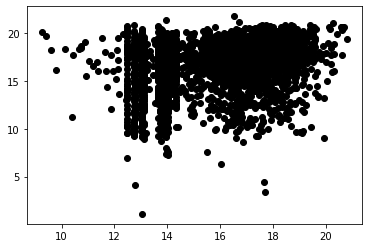

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_sub_X['actor_logrev_of_past_10_years_2'], train_sub_Y, 'o', color='black')

In [ ]:
#build model
regr_scale = linear_model.LinearRegression()
# Train the model using the train sub set
regr_scale.fit(train_sub_X, train_sub_Y)
# Make predictions using the validtaion set
log_revenue_pred = regr_scale.predict(val_X)
# The coefficients
print('Coefficients: \n', regr_scale.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(val_Y, log_revenue_pred))

Coefficients: 
 [ 0.0601897   0.34792168  0.19386165 -0.11720304 -0.1466799   0.13131415
  0.22538766 -0.10994471  0.03123113  0.17028775  0.01219154  0.20301739
  0.12913776  0.41743323 -0.01825561  0.19288811  0.05302541  0.00460282
 -0.02474838  0.01240789  0.10842251  0.1203813   0.12860157  0.05781278
  0.10578113  0.05585076  0.04417214  0.02171786  0.03414483  0.00777594
 -0.01129192]
Mean squared error: 8.57


##Build baseline on train and get MSE on test (gender score and star power)

In [ ]:
#train to test
#train set
train_X = train[['gender_score','actor_is_top_100_of_past_10_years_0','actor_is_top_100_of_past_10_years_1','actor_is_top_100_of_past_10_years_2',
                              'actor_is_top_100_of_past_10_years_3','actor_is_top_100_of_past_10_years_4','actor_is_top_100_of_past_5_years_0','actor_is_top_100_of_past_5_years_1',
                              'actor_is_top_100_of_past_5_years_2','actor_is_top_100_of_past_5_years_3','actor_is_top_100_of_past_5_years_4','actor_is_top_100_of_past_2_years_0',
                              'actor_is_top_100_of_past_2_years_1','actor_is_top_100_of_past_2_years_2','actor_is_top_100_of_past_2_years_3','actor_is_top_100_of_past_2_years_4',
                              'actor_logrev_of_past_10_years_0','actor_logrev_of_past_10_years_1','actor_logrev_of_past_10_years_2','actor_logrev_of_past_10_years_3',
                              'actor_logrev_of_past_10_years_4','actor_logrev_of_past_5_years_0','actor_logrev_of_past_5_years_1','actor_logrev_of_past_5_years_2',
                              'actor_logrev_of_past_5_years_3','actor_logrev_of_past_5_years_4','actor_logrev_of_past_2_years_0','actor_logrev_of_past_2_years_1',
                              'actor_logrev_of_past_2_years_2','actor_logrev_of_past_2_years_3','actor_logrev_of_past_2_years_4']]
train_Y = train['log_revenue_final']
#test set
test_X = test[['gender_score','actor_is_top_100_of_past_10_years_0','actor_is_top_100_of_past_10_years_1','actor_is_top_100_of_past_10_years_2',
                              'actor_is_top_100_of_past_10_years_3','actor_is_top_100_of_past_10_years_4','actor_is_top_100_of_past_5_years_0','actor_is_top_100_of_past_5_years_1',
                              'actor_is_top_100_of_past_5_years_2','actor_is_top_100_of_past_5_years_3','actor_is_top_100_of_past_5_years_4','actor_is_top_100_of_past_2_years_0',
                              'actor_is_top_100_of_past_2_years_1','actor_is_top_100_of_past_2_years_2','actor_is_top_100_of_past_2_years_3','actor_is_top_100_of_past_2_years_4',
                              'actor_logrev_of_past_10_years_0','actor_logrev_of_past_10_years_1','actor_logrev_of_past_10_years_2','actor_logrev_of_past_10_years_3',
                              'actor_logrev_of_past_10_years_4','actor_logrev_of_past_5_years_0','actor_logrev_of_past_5_years_1','actor_logrev_of_past_5_years_2',
                              'actor_logrev_of_past_5_years_3','actor_logrev_of_past_5_years_4','actor_logrev_of_past_2_years_0','actor_logrev_of_past_2_years_1',
                              'actor_logrev_of_past_2_years_2','actor_logrev_of_past_2_years_3','actor_logrev_of_past_2_years_4']]
test_Y = test['log_revenue_final']

In [ ]:
#build model
regr2 = linear_model.LinearRegression()
# Train the model using the training sets
regr2.fit(train_X, train_Y)
# Make predictions using the testing set
log_revenue_pred2 = regr2.predict(test_X)

In [ ]:
# The coefficients
print('Coefficients: \n', regr2.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(test_Y, log_revenue_pred2))

Coefficients: 
 [-0.11471967  0.32033511  0.24385416  0.0087612  -0.05298789 -0.0122751
  0.20449049 -0.00287078 -0.09314412  0.20321615  0.00561352  0.18002281
  0.05571756  0.38244175 -0.03560476  0.27904514  0.06966787  0.02106179
 -0.02971931  0.01811599  0.10087106  0.13048768  0.11029534  0.06640282
  0.09907241  0.06023444  0.04116121  0.01391303  0.03095857  0.01246774
 -0.00592286]
Mean squared error: 6.99


##Read feature ranking results

In [6]:
g_path = "/content/drive/My Drive/Term_Project_Unsupervised_Learners/graphs/"
with open(g_path+"feature_names.txt") as f:
    list2 = eval(f.read())


In [7]:
f = open(g_path + 'mutual_information_ranking1.txt',"r+") 
feature_ranking = f.read()
feature_ranking = feature_ranking.split('\n')
feature_ranking = feature_ranking[1:-1]
feature_ranking

['log_budget_final',
 'director_logrev_of_past_5_years_0',
 'director_logrev_of_past_10_years_0',
 'actor_logrev_of_past_10_years_0',
 'actor_logrev_of_past_10_years_1',
 'director_logrev_of_past_2_years_0',
 'actor_logrev_of_past_5_years_0',
 'actor_logrev_of_past_5_years_1',
 'actor_logrev_of_past_2_years_0',
 'runtime',
 'Adventure',
 'major',
 'actor_logrev_of_past_10_years_3',
 'actor_logrev_of_past_2_years_1',
 'minor',
 'actor_logrev_of_past_5_years_4',
 'actor_is_top_100_of_past_10_years_0',
 'actor_logrev_of_past_10_years_2',
 'actor_is_top_100_of_past_5_years_0',
 'actor_logrev_of_past_2_years_2',
 'actor_logrev_of_past_5_years_3',
 'sequel',
 'Family',
 'actor_is_top_100_of_past_10_years_1',
 'actor_logrev_of_past_10_years_4',
 'actor_logrev_of_past_2_years_4',
 'Documentary',
 'Animation',
 'Fantasy',
 'actor_logrev_of_past_2_years_3',
 'actor_logrev_of_past_5_years_2',
 'Drama',
 'actor_is_top_100_of_past_5_years_1',
 'director_is_top_50_of_past_5_years_0',
 'gender_score'

In [8]:
#keep top k features
index_k = feature_ranking.index('medium')
top_features = feature_ranking[:index_k+1]
top_features

['log_budget_final',
 'director_logrev_of_past_5_years_0',
 'director_logrev_of_past_10_years_0',
 'actor_logrev_of_past_10_years_0',
 'actor_logrev_of_past_10_years_1',
 'director_logrev_of_past_2_years_0',
 'actor_logrev_of_past_5_years_0',
 'actor_logrev_of_past_5_years_1',
 'actor_logrev_of_past_2_years_0',
 'runtime',
 'Adventure',
 'major',
 'actor_logrev_of_past_10_years_3',
 'actor_logrev_of_past_2_years_1',
 'minor',
 'actor_logrev_of_past_5_years_4',
 'actor_is_top_100_of_past_10_years_0',
 'actor_logrev_of_past_10_years_2',
 'actor_is_top_100_of_past_5_years_0',
 'actor_logrev_of_past_2_years_2',
 'actor_logrev_of_past_5_years_3',
 'sequel',
 'Family',
 'actor_is_top_100_of_past_10_years_1',
 'actor_logrev_of_past_10_years_4',
 'actor_logrev_of_past_2_years_4',
 'Documentary',
 'Animation',
 'Fantasy',
 'actor_logrev_of_past_2_years_3',
 'actor_logrev_of_past_5_years_2',
 'Drama',
 'actor_is_top_100_of_past_5_years_1',
 'director_is_top_50_of_past_5_years_0',
 'gender_score'

##Decision Tree Regressor (no need to scale)
Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.

In [9]:
#prepare data
train_sub_X_dt = train_sub[top_features]
train_sub_Y_dt = train_sub['log_revenue_final']
val_X_dt = val[top_features]
val_Y_dt = val['log_revenue_final']

In [10]:
####hyperparameter tuning 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ParameterGrid

In [47]:
def tuning_dt(parameters):
    grid = ParameterGrid(parameters)
    min_mse = 1000
    r_2_best = 0
    min_params = {}
    leaf = 0
    split = 0
    depth = 0
    for params in grid:
        regressor = DecisionTreeRegressor( **params)
        regressor.fit(train_sub_X_dt, train_sub_Y_dt)
        # Make predictions using the validtaion set
        log_revenue_pred = regressor.predict(val_X_dt)
        # Calculate MSE
        mse = mean_squared_error(val_Y_dt, log_revenue_pred)
        #Calculate R^2
        r_2 = r2_score(val_Y_dt, log_revenue_pred)

        if mse < min_mse:
            min_mse = mse
            r_2_best = r_2
            leaf = params['min_samples_leaf']
            split = params['min_samples_split']
            depth = params['max_depth']
    print('Smallest MSE is %s, at min leaf: %s, min split: %s, max depth: %s' % (min_mse, leaf, split, depth))
    return r_2_best


In [49]:
tuning_dt({'min_samples_leaf': [16, 32, 64],'min_samples_split':[32, 64, 128], 'max_depth':[4, 6, 8, 10, 15, 20, 25]})

Smallest MSE is 4.005271266747493, at min leaf: 16, min split: 128, max depth: 6


0.5989683700971696

##SVR (need to scale)
If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

In [29]:
#prepare data
train_sub_X_svr = train_sub[top_features]
train_sub_Y_svr = train_sub['log_revenue_final']
val_X_svr = val[top_features]
val_Y_svr = val['log_revenue_final']

In [26]:
####tune hyperparameter
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



In [48]:
def tuning_svr(parameters):
    grid = ParameterGrid(parameters)
    min_mse = 1000
    r_2_best = 0
    min_params = {}
    c = 0
    gamma = 0
    for params in grid:
        svr_regr = make_pipeline(StandardScaler(), SVR(epsilon=0.2, **params))
        svr_regr.fit(train_sub_X_svr, train_sub_Y_svr)
        log_revenue_pred = svr_regr.predict(val_X_svr)
        mse = mean_squared_error(val_Y_svr, log_revenue_pred)
        r_2 = r2_score(val_Y_svr, log_revenue_pred)


        if mse < min_mse:
            min_mse = mse
            r_2_best = r_2
            c = params['C']
            gamma = params['gamma']
    print('Smallest MSE is %s, at min C: %s, gamma: %s' % (min_mse, c, gamma))
    return r_2_best


In [50]:
c_s = [550, 600]
gamma_s = [0.0009, 0.001, 0.0015]
tuning_svr({'C': c_s,'gamma': gamma_s})

Smallest MSE is 4.198389136787174, at min C: 600, gamma: 0.001


0.5796322580020039